<a href="https://colab.research.google.com/github/christinevu510/Predictive-Modeling-of-Online-Shopping-Intentions/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modeling of Online Shopping Intentions**

Sau Chow, Mirna Philip, and Christine Vu

Shiley-Marcos School of Engineering, University of San Diego

ADS 504: Machine Learning and Deep Learning for Data Science

Dr. Roozbeh Sadeghian

August 14, 2023

&nbsp;

***

&nbsp;

# **Load Data and Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import io
import warnings

from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bootstrap_point632_score
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics, preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive

warnings.filterwarnings("ignore")

In [ ]:
!pip install imbalanced-learn

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/christinevu510/Predictive-Modeling-of-Online-Shopping-Intentions/main/data/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


***

&nbsp;

# **Data Pre-processing**

In [ ]:
# Check data type of predictors
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Out of the 19 features, 18 serve as predictors for a single target variable, *Revenue*. Among these predictors, 10 are numerical attributes, while 8 are categorical attributes.

In [ ]:
df.shape

(12330, 18)

In [ ]:
# Key statistics of studied variables
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Check for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# Class proportion of target variable
df["Revenue"].value_counts()/df.shape[0] * 100

False    84.525547
True     15.474453
Name: Revenue, dtype: float64

***

&nbsp;

# **Exploratory Data Analysis**

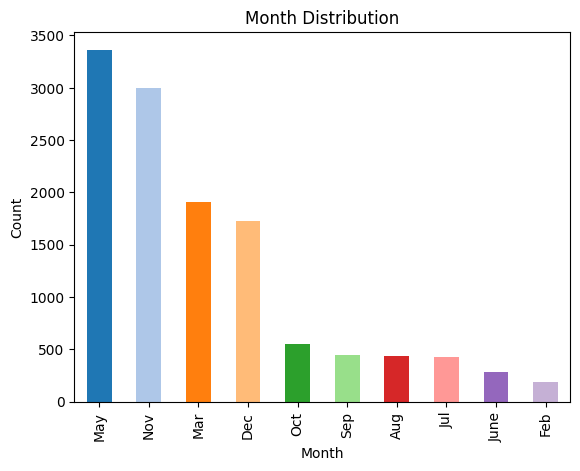

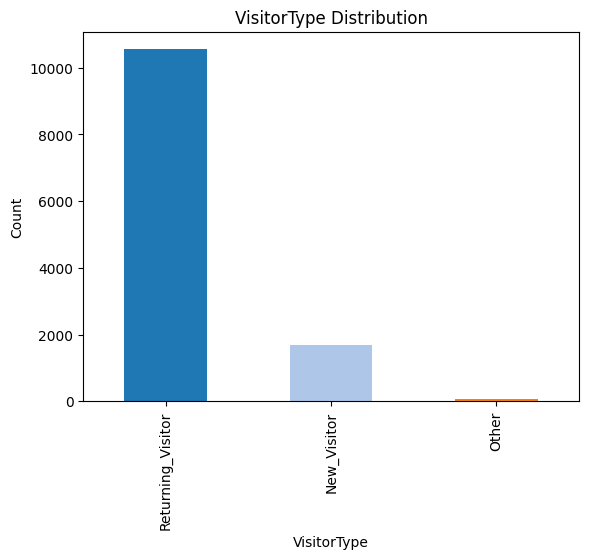

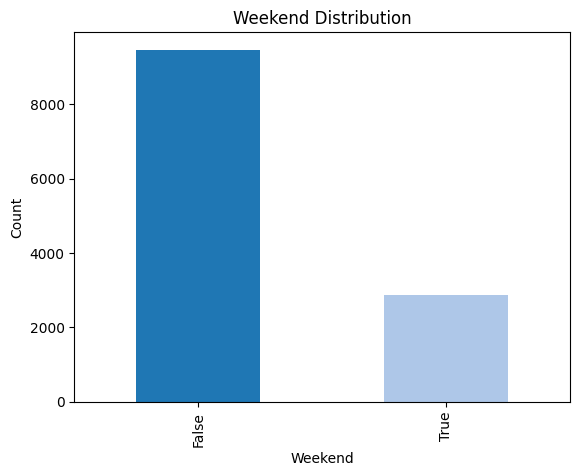

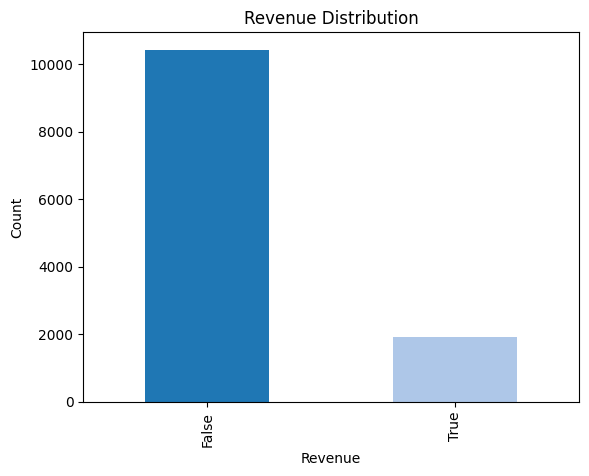

In [ ]:
# Categorical features
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']

# Plot categorical features
for feature in categorical_features:
  colors = plt.cm.tab20.colors
  df[feature].value_counts().plot(kind = 'bar', color = colors)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(f'{feature} Distribution')
  plt.show()

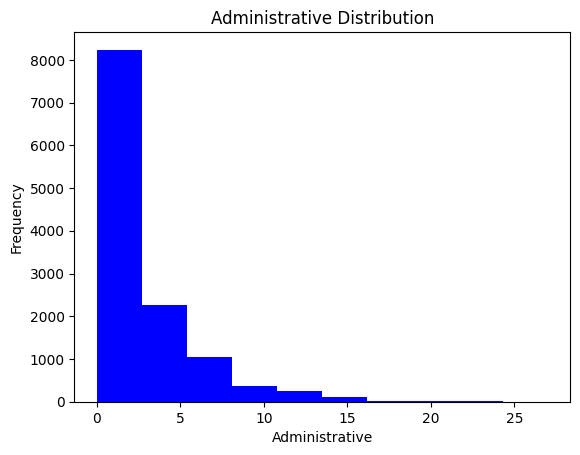

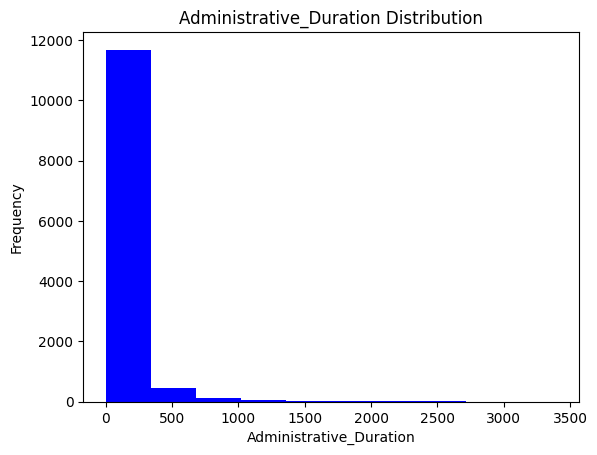

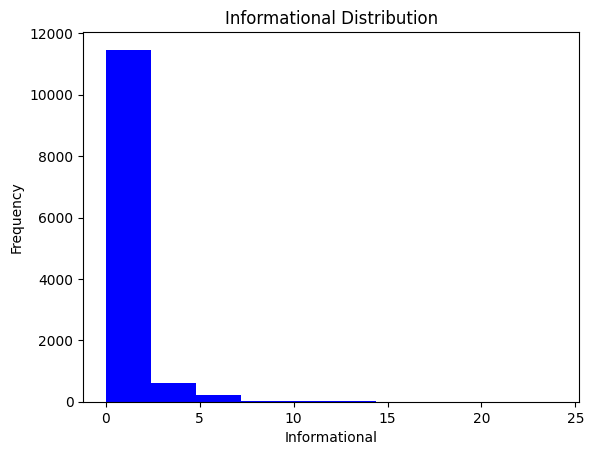

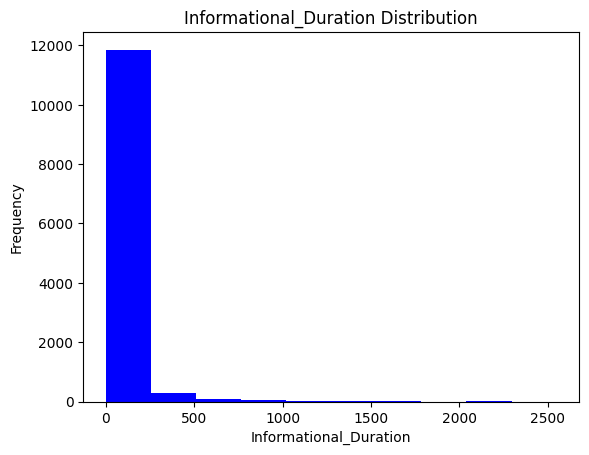

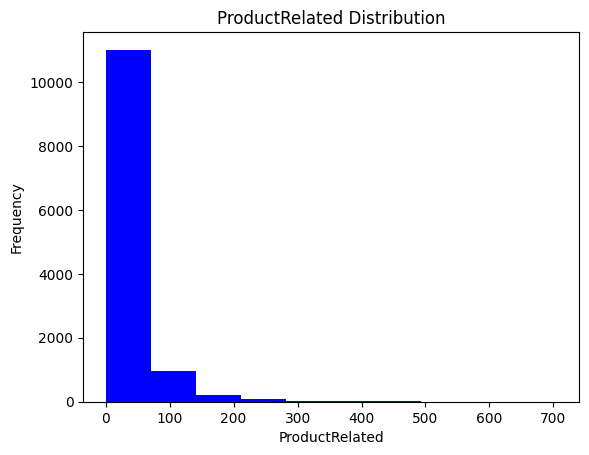

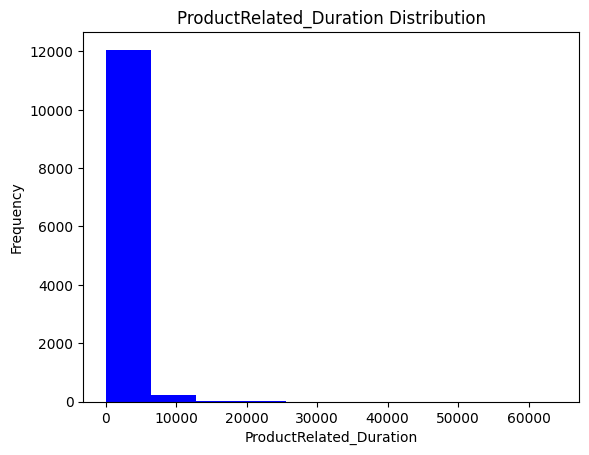

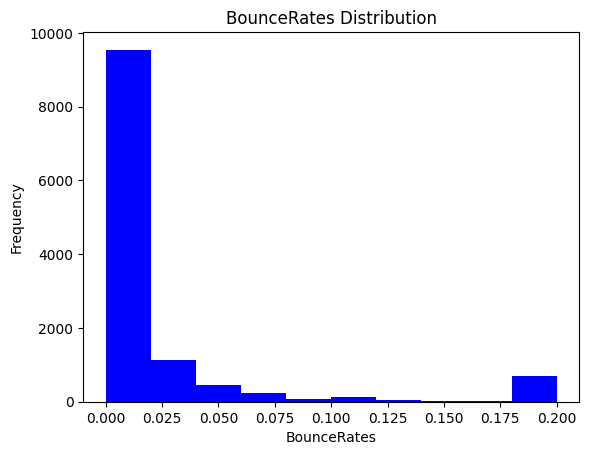

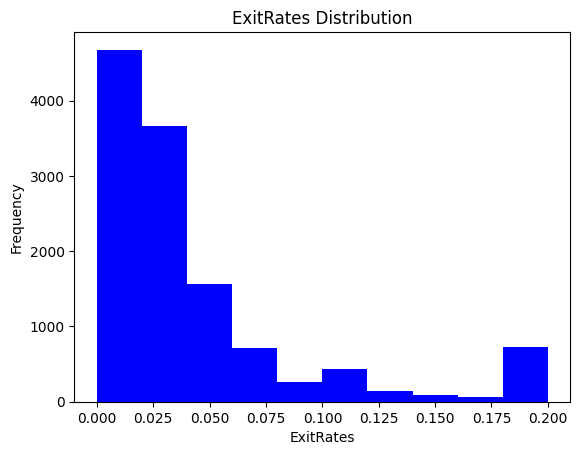

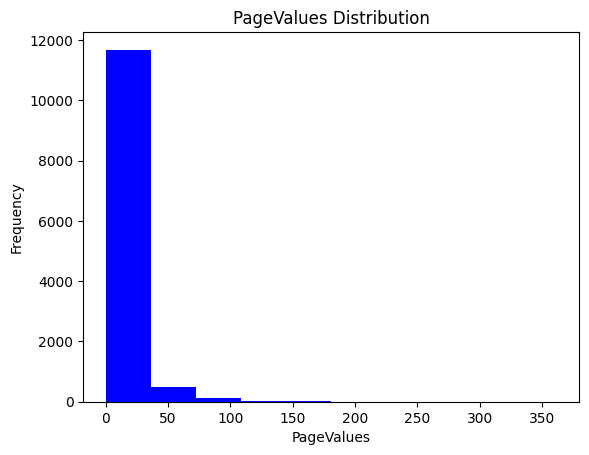

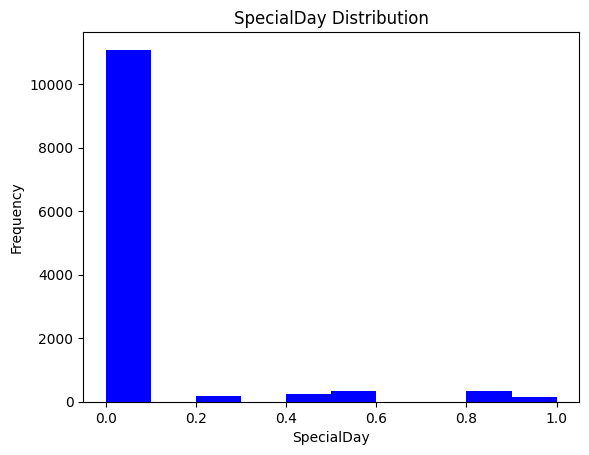

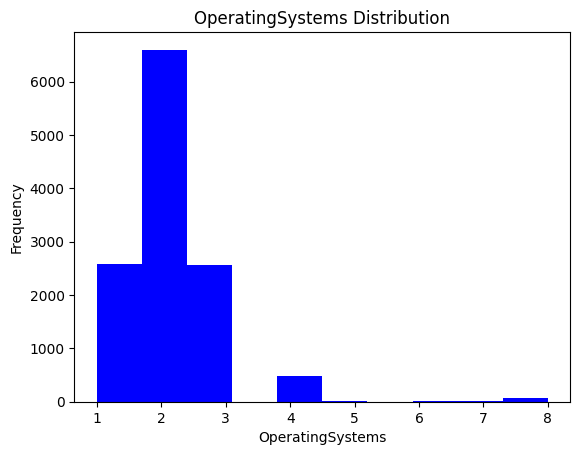

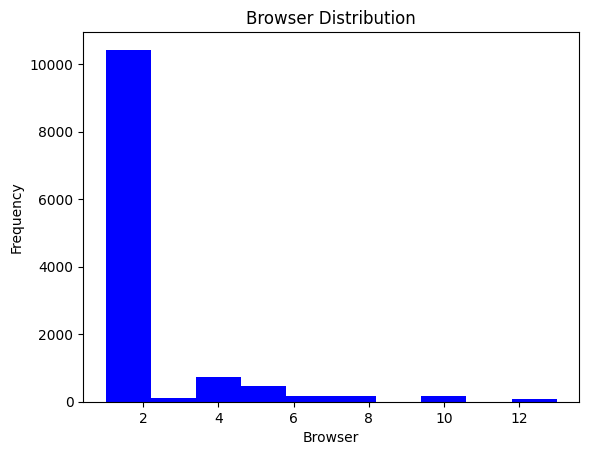

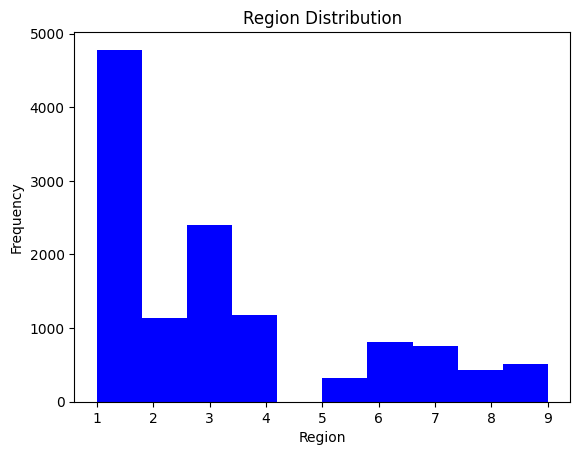

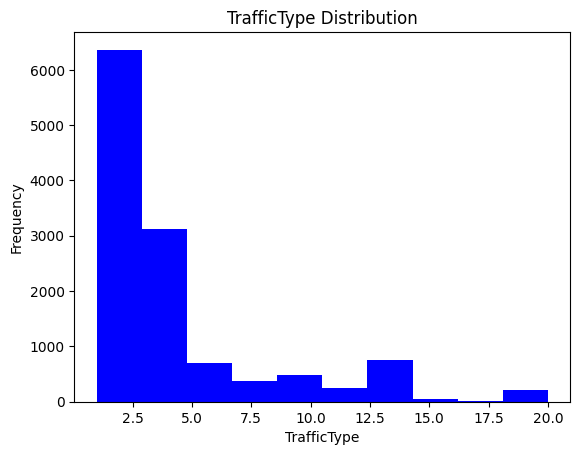

In [ ]:
# Numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                      'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

# Plot numerical features
for feature in numerical_features:
  df[feature].plot(kind = 'hist', color = 'blue')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'{feature} Distribution')
  plt.show()

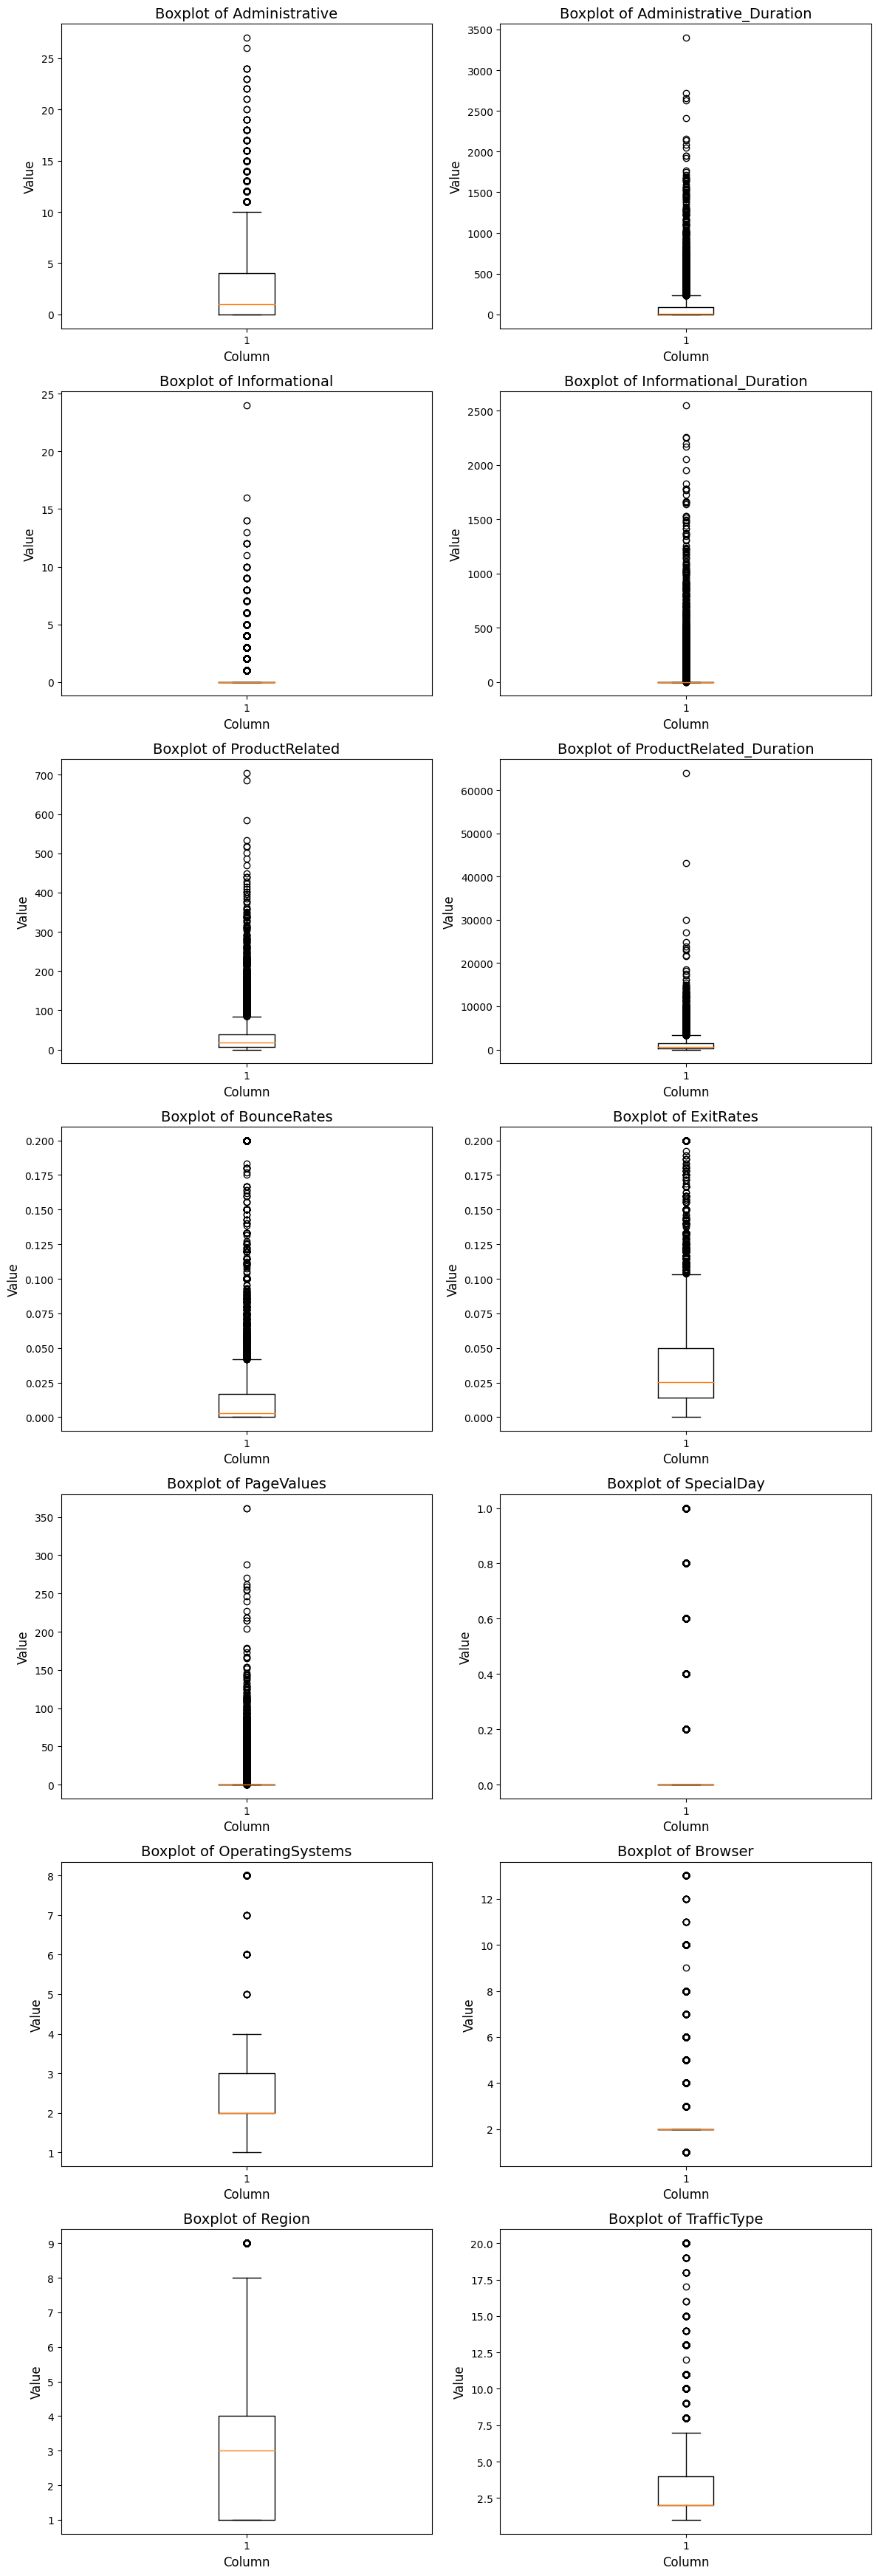

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns for the subplot layout
num_cols = len(numeric_columns.columns)
num_rows = (num_cols - 1) // 2 + 1

# Create separate boxplots for each numeric column
plt.figure(figsize=(12, 35))  # Increase the height of the figure
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, 2, i+1)  # Adjust the subplot dimensions based on num_cols
    plt.boxplot(numeric_columns[column])
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel('Column', fontsize=12)

plt.tight_layout()
plt.show()

***

&nbsp;

# **Model Training**

## Data Preparation

### Train-Test Split

In [ ]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling Numeric Variables

In [ ]:
# Scale the numeric features so that they can be fed to distance sensitive models like KNN
from sklearn.preprocessing import StandardScaler

# Feature Scaling
X_train_numeric = StandardScaler().fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_numeric = StandardScaler().fit_transform(X_test.select_dtypes(include=['int64', 'float64']))

### Handling Categorical Variables

In [ ]:
# One-hot encode the categorical columns
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
ohe = OneHotEncoder(drop='first', sparse=False)
ct = ColumnTransformer(transformers=[('encoder', ohe, categorical_columns)], remainder='passthrough')
X_train_categorical = ct.fit_transform(X_train)
X_test_categorical = ct.transform(X_test)

In [ ]:
# Combine numeric and categorical features
X_train_combined = pd.concat([pd.DataFrame(X_train_numeric, columns=X_train.select_dtypes(include=['int64', 'float64']).columns), pd.DataFrame(X_train_categorical)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_numeric, columns=X_test.select_dtypes(include=['int64', 'float64']).columns), pd.DataFrame(X_test_categorical)], axis=1)


### Oversample the Dataset to offset imbalance

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
# Apply one-hot encoding to the categorical columns to one-hot encode
X_encoded = pd.get_dummies(df, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'])
print(X_encoded.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_18  \
0         0.20       0.20         0.0         0.0  ...               0   
1         0.00       0.10         0.0         0.0  ...          

### Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Listing  of numerical columns to scale
numerical_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
# fit_transform method scales the numerical columns in the DataFrame.
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

# Display the first few rows of the scaled dataset
print(df.head())


   Administrative  Administrative_Duration  Informational  \
0               0                -0.457191              0   
1               0                -0.457191              0   
2               0                -0.457191              0   
3               0                -0.457191              0   
4               0                -0.457191              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931               1                -0.624348   
1               -0.244931               2                -0.590903   
2               -0.244931               1                -0.624348   
3               -0.244931               2                -0.622954   
4               -0.244931              10                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821   Feb                 1   
1    -0.457683   1.171473   -0.317178   -0.308821   Feb   

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) will include all columns except "Revenue"
X = df.drop(columns=['Revenue'])
# Target variable (y) will be the "Revenue" column
y = df['Revenue']
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9864, 17)
X_test shape: (2466, 17)
y_train shape: (9864,)
y_test shape: (2466,)


### Optional: Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


## Modeling (Cross-Validation)

### Feature Selection

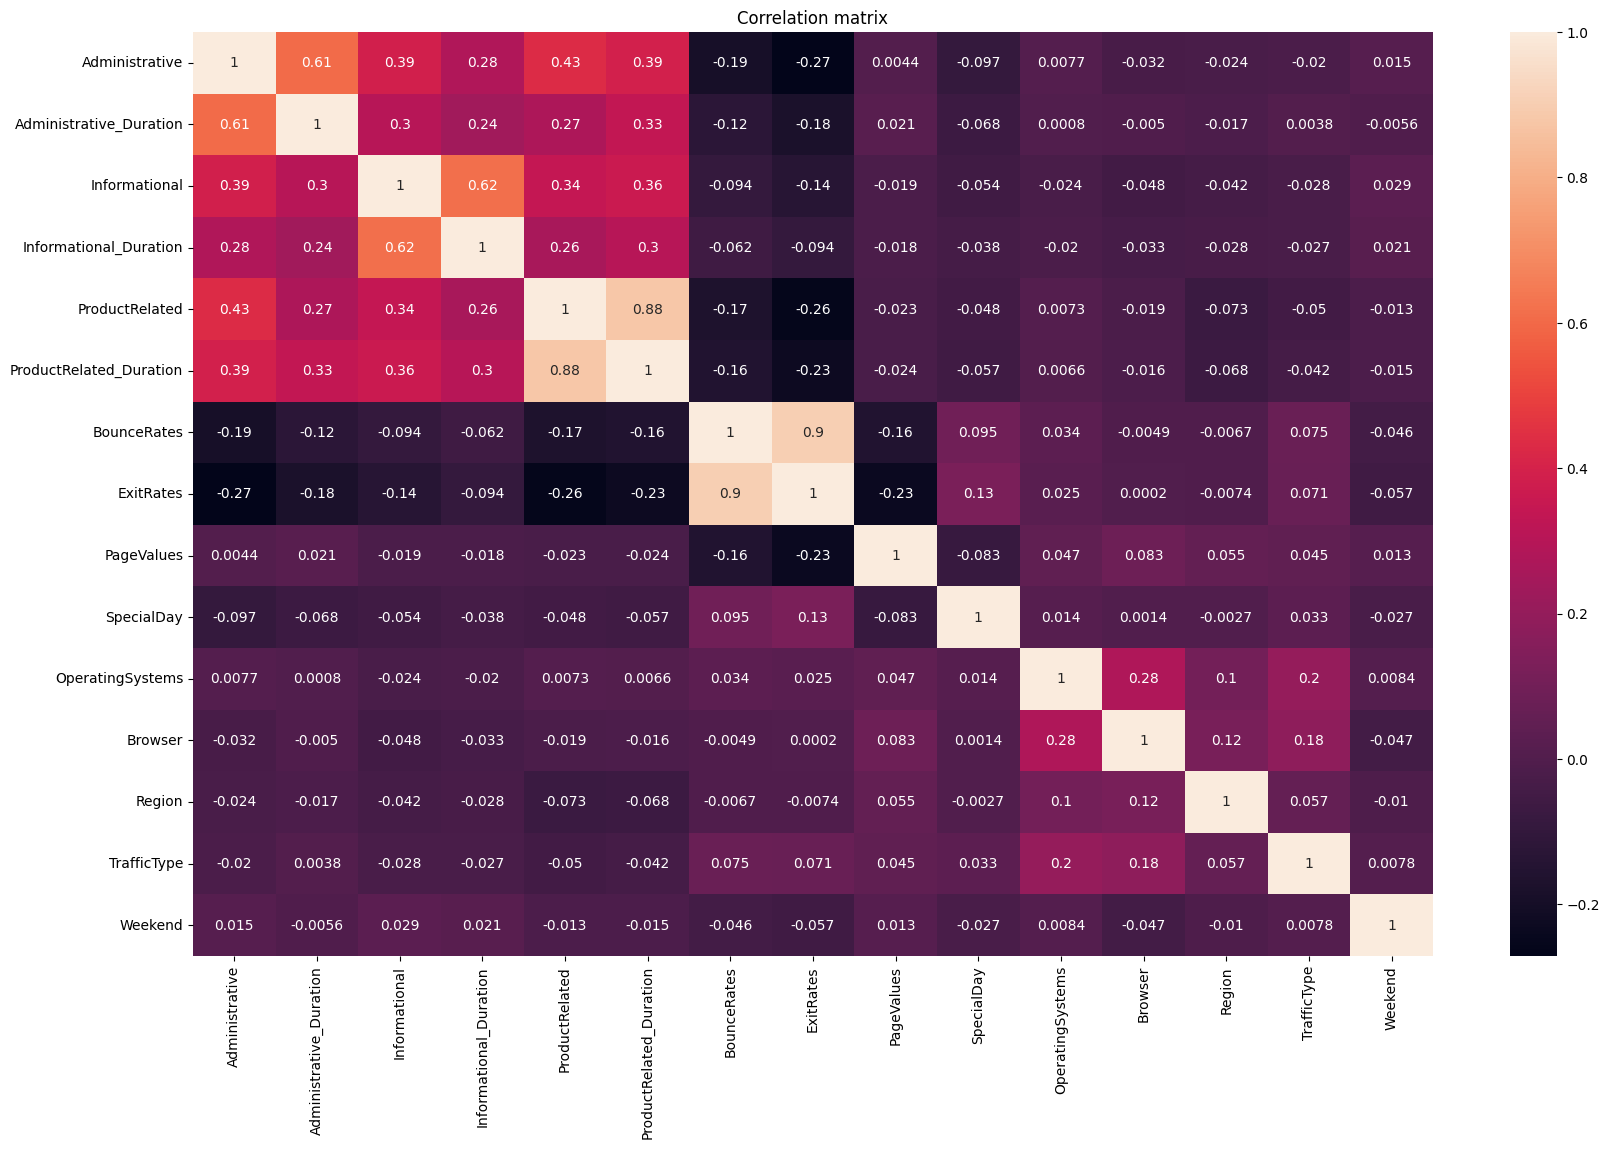

In [ ]:
# Let's do a correlation heatmap to see which predictors are most highly correlated
plt.figure(figsize=(20, 12))
sns.heatmap(X_train_resampled.corr(), annot=True)
plt.title("Correlation matrix")#title of graph
plt.show()#show graph

In [ ]:
merged_train = pd.concat([X_train_resampled, y_train_resampled], axis=1)

corr_matrix = merged_train.corr()
matrix = corr_matrix["Revenue"].sort_values(ascending=False)
matrix = matrix[abs(matrix) >= 0]

print("Features Correlated to Target - Ranked Highest to Lowest")
print(matrix)

print()
print("Pairwise Correlation - Determine Features That Are Highly Correlated - Cutoff at 0.3")
# Indexing with numbers on a numpy matrix will probably be faster
corr = corr_matrix.values
rows, cols = corr.shape

for i in range(cols):
    for j in range(i + 1, cols):
        if corr[i, j] > 0.3:
            print(corr_matrix.columns[i] + ', ' + corr_matrix.index[j] + ': ' + str(corr[i, j]))

Features Correlated to Target - Ranked Highest to Lowest
Revenue                    1.000000
PageValues                 0.449196
ProductRelated             0.177967
ProductRelated_Duration    0.175946
Administrative             0.172538
Informational              0.119930
Administrative_Duration    0.116188
Informational_Duration     0.081573
Weekend                    0.034659
Browser                    0.027408
TrafficType               -0.002969
Region                    -0.011101
OperatingSystems          -0.034146
SpecialDay                -0.145569
BounceRates               -0.254195
ExitRates                 -0.342365
Name: Revenue, dtype: float64

Pairwise Correlation - Determine Features That Are Highly Correlated - Cutoff at 0.3
Administrative, Administrative_Duration: 0.6054061880575325
Administrative, Informational: 0.3876301415292727
Administrative, ProductRelated: 0.43216326042875164
Administrative, ProductRelated_Duration: 0.3933894447998895
Administrative_Duration, Info

In [ ]:
# Run Random Forest to Check for Most Predictive Features - IN PROGRESS
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0, n_estimators = 100)

columns_to_encode = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_train.drop(columns=columns_to_encode, inplace=True)
X_train = pd.concat([X_train, y_train], axis=1)

# fit the model
model = rfc.fit(X_train, y_train)

# Plot the top features based on its importance and most important feature on top
(pd.Series(model.feature_importances_, index = X_train_combined.columns)
   .nlargest(47)
   .plot(kind='barh', figsize = [10,7])
   .invert_yaxis())

plt.yticks(size = 15)
plt.title('Top Features derived by Random Forest', size = 20)

KeyError: ignored

In [ ]:
print(X_train_resampled.head(5))

   Administrative  Administrative_Duration  Informational  \
0               0                -0.457191              0   
1               2                -0.377993              0   
2               0                -0.457191              0   
3               5                -0.178867              4   
4               0                -0.457191              1   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931               7                -0.574703   
1               -0.244931              81                 0.129163   
2               -0.244931               1                -0.624348   
3                2.447910               5                -0.585363   
4               -0.209405               9                -0.478548   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0    -0.163049   0.387532   -0.317178   -0.308821   Mar                 2   
1    -0.406759  -0.599652   -0.168016   -0.308821   Nov   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

print("Cross Validation Results: ")

selected_cols = ['PageValues', 'ProductRelated', 'ProductRelated_Duration',
                 'Administrative', 'Informational', 'Administrative_Duration']

X = X_train_resampled[selected_cols]
y = y_train_resampled

# 5-fold cross-validation with logistic regression
# see documentation: liblinear good for small datasets
logreg = LogisticRegression(solver='liblinear')
accuracy_logreg = cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()
avg_precision_logreg = cross_val_score(logreg, X, y, cv=5, scoring='average_precision').mean()
f1_logreg = cross_val_score(logreg, X, y, cv=5, scoring='f1').mean()
precision_logreg = cross_val_score(logreg, X, y, cv=5, scoring='precision').mean()
recall_logreg = cross_val_score(logreg, X, y, cv=5, scoring='recall').mean()
roc_auc_logreg = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc').mean()

print(f'Logistic Regression: training accuracy score: {accuracy_logreg}')
print(f'Logistic Regression: training avg precision score: {avg_precision_logreg}')
print(f'Logistic Regression: training f1 score: {f1_logreg}')
print(f'Logistic Regression: training precision score: {precision_logreg}')
print(f'Logistic Regression: training recall score: {recall_logreg}')
print(f'Logistic Regression: training roc auc score: {roc_auc_logreg}')


# 5-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
#print("KNN:")
#print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
accuracy_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
avg_precision_knn = cross_val_score(knn, X, y, cv=5, scoring='average_precision').mean()
f1_knn = cross_val_score(knn, X, y, cv=5, scoring='f1').mean()
precision_knn = cross_val_score(knn, X, y, cv=5, scoring='precision').mean()
recall_knn = cross_val_score(knn, X, y, cv=5, scoring='recall').mean()
roc_auc_knn = cross_val_score(knn, X, y, cv=5, scoring='roc_auc').mean()

print(f'KNN: training accuracy score: {accuracy_knn}')
print(f'KNN: training avg precision score: {avg_precision_knn}')
print(f'KNN: training f1 score: {f1_knn}')
print(f'KNN: training precision score: {precision_knn}')
print(f'KNN: training recall score: {recall_knn}')
print(f'KNN: training roc auc score: {roc_auc_knn}')


# Perform 5-fold cross validation
clf = tree.DecisionTreeClassifier(max_depth=i)
#print("Decision Tree:")
#print(cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4).mean())
accuracy_decision_tree = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
avg_precision_decision_tree = cross_val_score(clf, X, y, cv=5, scoring='average_precision').mean()
f1_decision_tree = cross_val_score(clf, X, y, cv=5, scoring='f1').mean()
precision_decision_tree = cross_val_score(clf, X, y, cv=5, scoring='precision').mean()
recall_decision_tree = cross_val_score(clf, X, y, cv=5, scoring='recall').mean()
roc_auc_decision_tree = cross_val_score(clf, X, y, cv=5, scoring='roc_auc').mean()

print(f'Decision Tree: training accuracy score: {accuracy_decision_tree}')
print(f'Decision Tree: training avg precision score: {avg_precision_decision_tree}')
print(f'Decision Tree: training f1 score: {f1_decision_tree}')
print(f'Decision Tree: training precision score: {precision_decision_tree}')
print(f'Decision Tree: training recall score: {recall_decision_tree}')
print(f'Decision Tree: training roc auc score: {roc_auc_decision_tree}')


# Perform 5-fold cross validation with Random Forest model
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")
#print("Random Forest:")
#print(cross_val_score(estimator=rfc, X=X, y=y, cv=7, n_jobs=4).mean())
accuracy_random_forest = cross_val_score(rfc, X, y, cv=5, scoring='accuracy').mean()
avg_precision_random_forest = cross_val_score(rfc, X, y, cv=5, scoring='average_precision').mean()
f1_random_forest = cross_val_score(rfc, X, y, cv=5, scoring='f1').mean()
precision_random_forest = cross_val_score(rfc, X, y, cv=5, scoring='precision').mean()
recall_random_forest = cross_val_score(rfc, X, y, cv=5, scoring='recall').mean()
roc_auc_random_forest = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc').mean()

print(f'Random Forest: training accuracy score: {accuracy_random_forest}')
print(f'Random Forest: training avg precision score: {avg_precision_random_forest}')
print(f'Random Forest: training f1 score: {f1_random_forest}')
print(f'Random Forest: training precision score: {precision_random_forest}')
print(f'Random Forest: training recall score: {recall_random_forest}')
print(f'Random Forest: training roc auc score: {roc_auc_random_forest}')


# Perform 5-fold cross validation with Gaussian NB
gnb = GaussianNB()
accuracy_gnb = cross_val_score(gnb, X, y, cv=5, scoring='accuracy').mean()
avg_precision_gnb = cross_val_score(gnb, X, y, cv=5, scoring='average_precision').mean()
f1_gnb = cross_val_score(gnb, X, y, cv=5, scoring='f1').mean()
precision_gnb = cross_val_score(gnb, X, y, cv=5, scoring='precision').mean()
recall_gnb = cross_val_score(gnb, X, y, cv=5, scoring='recall').mean()
roc_auc_gnb = cross_val_score(gnb, X, y, cv=5, scoring='roc_auc').mean()

print(f'Gaussian Naive Bayes: training accuracy score: {accuracy_gnb}')
print(f'Gaussian Naive Bayes: training avg precision score: {avg_precision_gnb}')
print(f'Gaussian Naive Bayes: training f1 score: {f1_gnb}')
print(f'Gaussian Naive Bayes: training precision score: {precision_gnb}')
print(f'Gaussian Naive Bayes: training recall score: {recall_gnb}')
print(f'Gaussian Naive Bayes: training roc auc score: {roc_auc_gnb}')


# Perform 5-fold cross validation with LinearSVC
lsvc = LinearSVC()
accuracy_lsvc = cross_val_score(lsvc, X, y, cv=5, scoring='accuracy').mean()
avg_precision_lsvc = cross_val_score(lsvc, X, y, cv=5, scoring='average_precision').mean()
f1_lsvc = cross_val_score(lsvc, X, y, cv=5, scoring='f1').mean()
precision_lsvc = cross_val_score(lsvc, X, y, cv=5, scoring='precision').mean()
recall_lsvc = cross_val_score(lsvc, X, y, cv=5, scoring='recall').mean()
roc_auc_lsvc = cross_val_score(lsvc, X, y, cv=5, scoring='roc_auc').mean()

print(f'Linear SVC: training accuracy score: {accuracy_lsvc}')
print(f'Linear SVC: training avg precision score: {avg_precision_lsvc}')
print(f'Linear SVC: training f1 score: {f1_lsvc}')
print(f'Linear SVC: training precision score: {precision_lsvc}')
print(f'Linear SVC: training recall score: {recall_lsvc}')
print(f'Linear SVC: training roc auc score: {roc_auc_lsvc}')


# Cross-validation for AdaBoost
num_folds = 5
scoring_metric = 'accuracy'
adaboost_model = AdaBoostClassifier()
adaboost_scores = cross_val_score(adaboost_model, X, y, cv=num_folds, scoring=scoring_metric)
print(f"AdaBoost Cross-Validation Scores: {adaboost_scores}")
print(f"Mean AdaBoost Cross-Validation Score: {adaboost_scores.mean()}")
accuracy_adaboost = cross_val_score(adaboost_model, X, y, cv=5, scoring='accuracy').mean()
avg_precision_adaboost = cross_val_score(adaboost_model, X, y, cv=5, scoring='average_precision').mean()
f1_adaboost = cross_val_score(adaboost_model, X, y, cv=5, scoring='f1').mean()
precision_adaboost = cross_val_score(adaboost_model, X, y, cv=5, scoring='precision').mean()
recall_adaboost = cross_val_score(adaboost_model, X, y, cv=5, scoring='recall').mean()
roc_auc_adaboost = cross_val_score(adaboost_model, X, y, cv=5, scoring='roc_auc').mean()

print(f'AdaBoost: training accuracy score: {accuracy_adaboost}')
print(f'AdaBoost: training avg precision score: {avg_precision_adaboost}')
print(f'AdaBoost: training f1 score: {f1_adaboost}')
print(f'AdaBoost: training precision score: {precision_adaboost}')
print(f'AdaBoost: training recall score: {recall_adaboost}')
print(f'AdaBoost: training roc auc score: {roc_auc_adaboost}')


# Cross-validation for Neural Network
neural_network_model = MLPClassifier()
neural_network_scores = cross_val_score(neural_network_model, X, y, cv=num_folds, scoring=scoring_metric)
print(f"Neural Network Cross-Validation Scores: {neural_network_scores}")
print(f"Mean Neural Network Cross-Validation Score: {neural_network_scores.mean()}")
print(f"AdaBoost Cross-Validation Scores: {neural_network_scores}")
print(f"Mean AdaBoost Cross-Validation Score: {neural_network_scores.mean()}")
accuracy_neural_network = cross_val_score(neural_network_model, X, y, cv=5, scoring='accuracy').mean()
avg_precision_neural_network = cross_val_score(neural_network_model, X, y, cv=5, scoring='average_precision').mean()
f1_neural_network = cross_val_score(neural_network_model, X, y, cv=5, scoring='f1').mean()
precision_neural_network = cross_val_score(neural_network_model, X, y, cv=5, scoring='precision').mean()
recall_neural_network = cross_val_score(neural_network_model, X, y, cv=5, scoring='recall').mean()
roc_auc_neural_network = cross_val_score(neural_network_model, X, y, cv=5, scoring='roc_auc').mean()

print(f'NeuralNetwork: training accuracy score: {accuracy_neural_network}')
print(f'NeuralNetwork: training avg precision score: {avg_precision_neural_network}')
print(f'NeuralNetwork: training f1 score: {f1_neural_network}')
print(f'NeuralNetwork: training precision score: {precision_neural_network}')
print(f'NeuralNetwork: training recall score: {recall_neural_network}')
print(f'NeuralNetwork: training roc auc score: {roc_auc_neural_network}')

Cross Validation Results: 
Logistic Regression: training accuracy score: 0.8119404464409609
Logistic Regression: training avg precision score: 0.8848455538299298
Logistic Regression: training f1 score: 0.794321100407497
Logistic Regression: training precision score: 0.87639680412899
Logistic Regression: training recall score: 0.7264261755151213
Logistic Regression: training roc auc score: 0.887975600829461
KNN: training accuracy score: 0.8023783241846505
KNN: training avg precision score: 0.8750742400840414
KNN: training f1 score: 0.8040136364563075
KNN: training precision score: 0.7974655861216822
KNN: training recall score: 0.8108022489450484
KNN: training roc auc score: 0.890241264574193
Decision Tree: training accuracy score: 0.9223736952255466
Decision Tree: training avg precision score: 0.9037438448004325
Decision Tree: training f1 score: 0.9264690484099969
Decision Tree: training precision score: 0.888309647984264
Decision Tree: training recall score: 0.9661743439446233
Decision

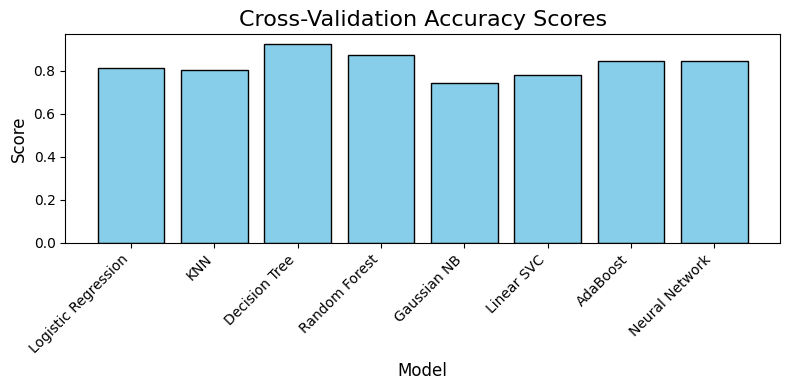

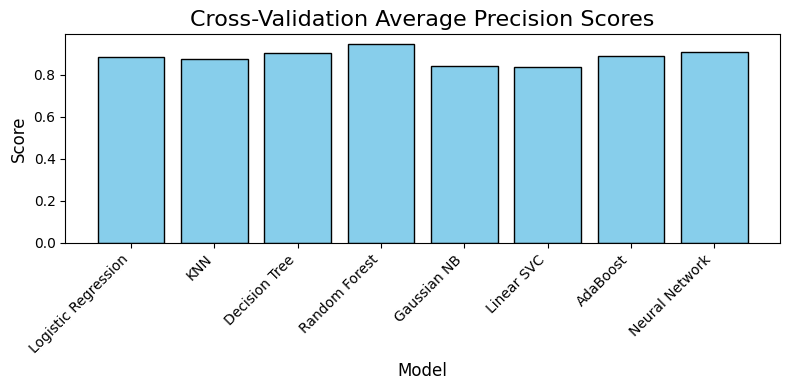

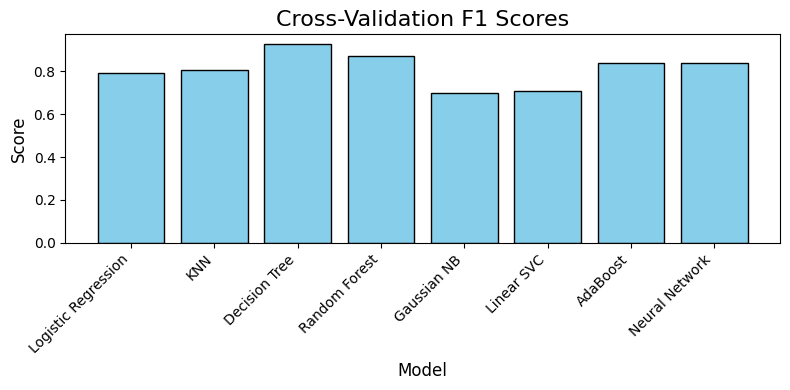

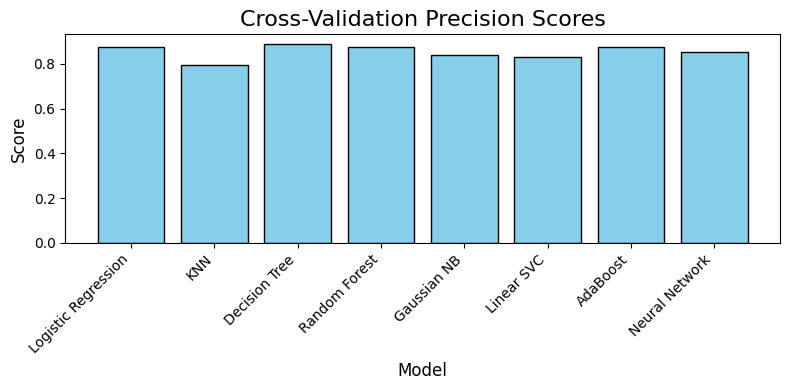

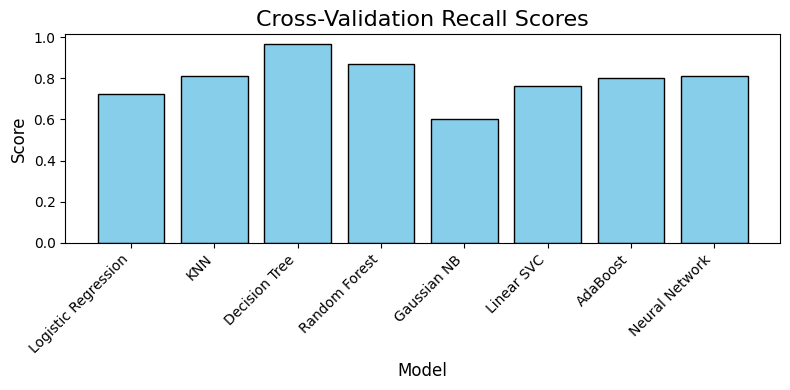

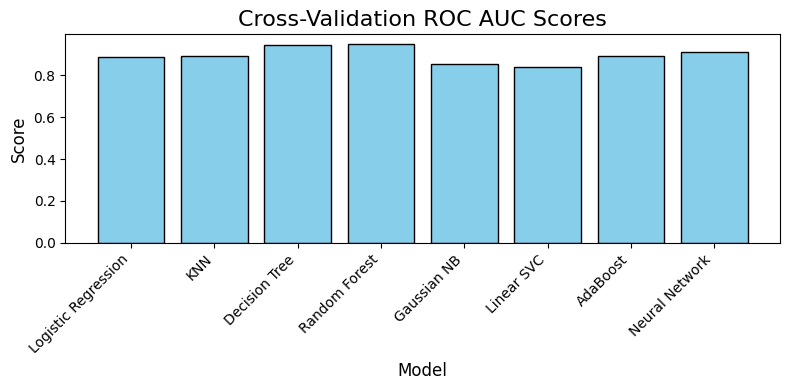

In [ ]:
# Plot the results against barchart

import matplotlib.pyplot as plt

# Cross-validation results
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gaussian NB', 'Linear SVC', 'AdaBoost', 'Neural Network']
accuracy_scores = [accuracy_logreg, accuracy_knn, accuracy_decision_tree, accuracy_random_forest,
                   accuracy_gnb, accuracy_lsvc, accuracy_adaboost, accuracy_neural_network]

avg_precision_scores = [avg_precision_logreg, avg_precision_knn, avg_precision_decision_tree, avg_precision_random_forest,
                        avg_precision_gnb, avg_precision_lsvc, avg_precision_adaboost, avg_precision_neural_network]
f1_scores = [f1_logreg, f1_knn, f1_decision_tree, f1_random_forest,
             f1_gnb, f1_lsvc, f1_adaboost, f1_neural_network]
precision_scores = [precision_logreg, precision_knn, precision_decision_tree, precision_random_forest,
                    precision_gnb, precision_lsvc, precision_adaboost, precision_neural_network]
recall_scores = [recall_logreg, recall_knn, recall_decision_tree, recall_random_forest,
                 recall_gnb, recall_lsvc, recall_adaboost, recall_neural_network]
roc_auc_scores = [roc_auc_logreg, roc_auc_knn, roc_auc_decision_tree, roc_auc_random_forest,
                  roc_auc_gnb, roc_auc_lsvc, roc_auc_adaboost, roc_auc_neural_network]

# Plotting function
def plot_scores(scores, title):
    plt.figure(figsize=(8, 4))
    plt.bar(models, scores, color='skyblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title(title, fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot accuracy scores
plot_scores(accuracy_scores, 'Cross-Validation Accuracy Scores')

# Plot average precision scores
plot_scores(avg_precision_scores, 'Cross-Validation Average Precision Scores')

# Plot F1 scores
plot_scores(f1_scores, 'Cross-Validation F1 Scores')

# Plot precision scores
plot_scores(precision_scores, 'Cross-Validation Precision Scores')

# Plot recall scores
plot_scores(recall_scores, 'Cross-Validation Recall Scores')

# Plot ROC AUC scores
plot_scores(roc_auc_scores, 'Cross-Validation ROC AUC Scores')


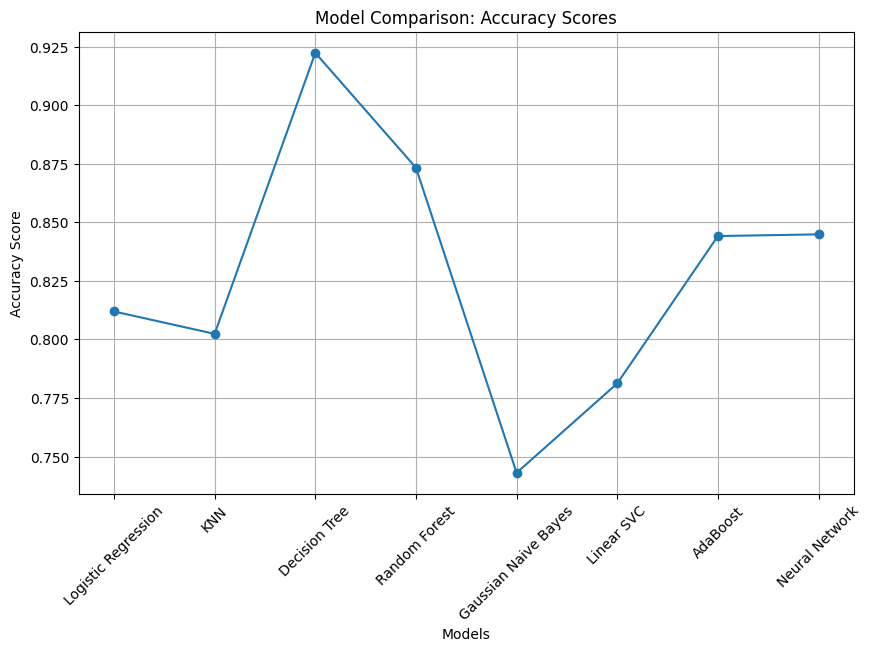

In [ ]:
import matplotlib.pyplot as plt

# Store the accuracy scores for each model in a dictionary
model_accuracy_scores = {
    'Logistic Regression': accuracy_logreg,
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_decision_tree,
    'Random Forest': accuracy_random_forest,
    'Gaussian Naive Bayes': accuracy_gnb,
    'Linear SVC': accuracy_lsvc,
    'AdaBoost': accuracy_adaboost,
    'Neural Network': accuracy_neural_network
}

# Create a line graph to compare accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(list(model_accuracy_scores.keys()), list(model_accuracy_scores.values()), marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison: Accuracy Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


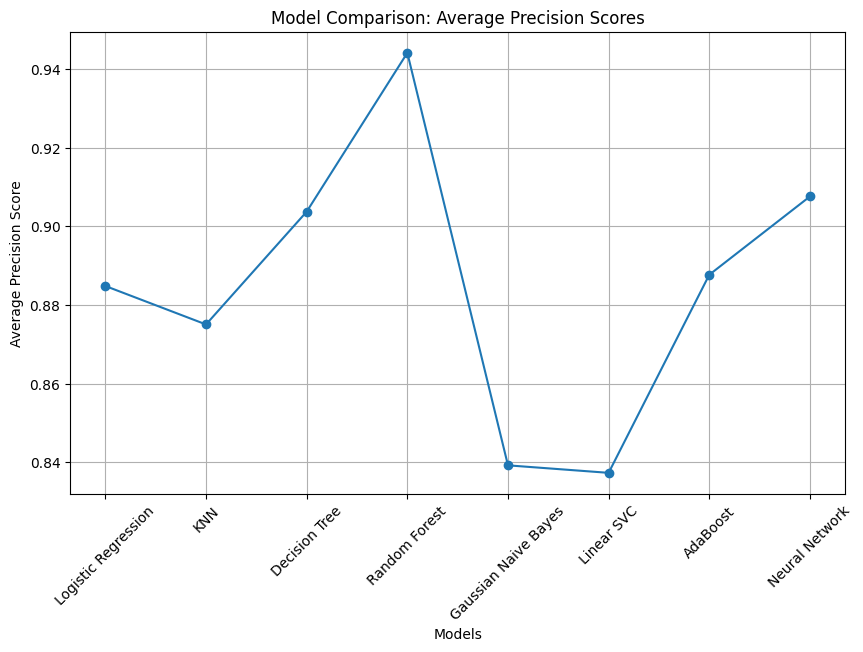

In [ ]:
import matplotlib.pyplot as plt

# Store the average precision scores for each model in a dictionary
model_avg_precision_scores = {
    'Logistic Regression': avg_precision_logreg,
    'KNN': avg_precision_knn,
    'Decision Tree': avg_precision_decision_tree,
    'Random Forest': avg_precision_random_forest,
    'Gaussian Naive Bayes': avg_precision_gnb,
    'Linear SVC': avg_precision_lsvc,
    'AdaBoost': avg_precision_adaboost,
    'Neural Network': avg_precision_neural_network
}

# Create a line graph to compare average precision scores
plt.figure(figsize=(10, 6))
plt.plot(list(model_avg_precision_scores.keys()), list(model_avg_precision_scores.values()), marker='o')
plt.xlabel('Models')
plt.ylabel('Average Precision Score')
plt.title('Model Comparison: Average Precision Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


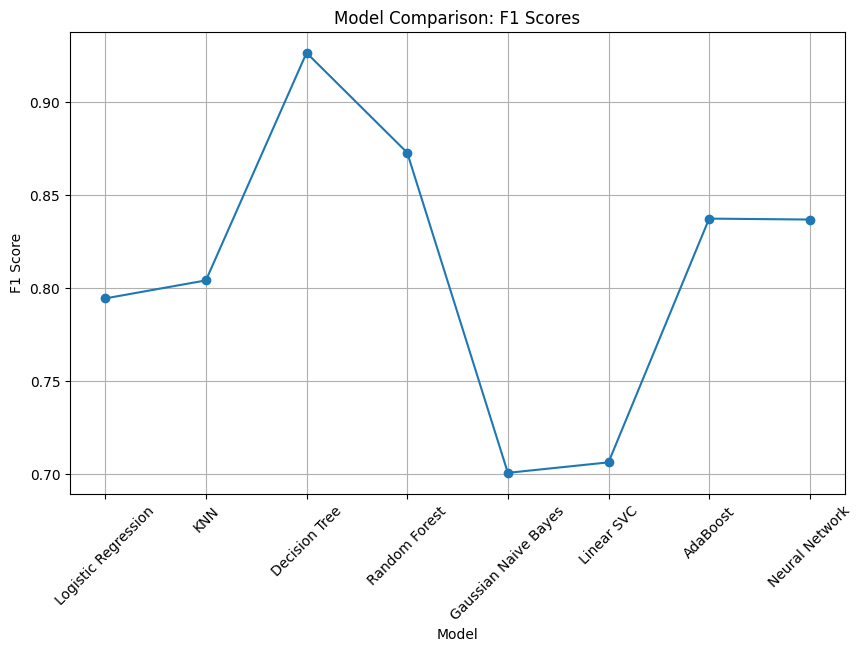

In [ ]:
import matplotlib.pyplot as plt

# Store the F1 scores for each model in a dictionary
model_f1_scores = {
    'Logistic Regression': f1_logreg,
    'KNN': f1_knn,
    'Decision Tree': f1_decision_tree,
    'Random Forest': f1_random_forest,
    'Gaussian Naive Bayes': f1_gnb,
    'Linear SVC': f1_lsvc,
    'AdaBoost': f1_adaboost,
    'Neural Network': f1_neural_network
}

# Create a line graph to compare F1 scores
plt.figure(figsize=(10, 6))
plt.plot(list(model_f1_scores.keys()), list(model_f1_scores.values()), marker='o')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison: F1 Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


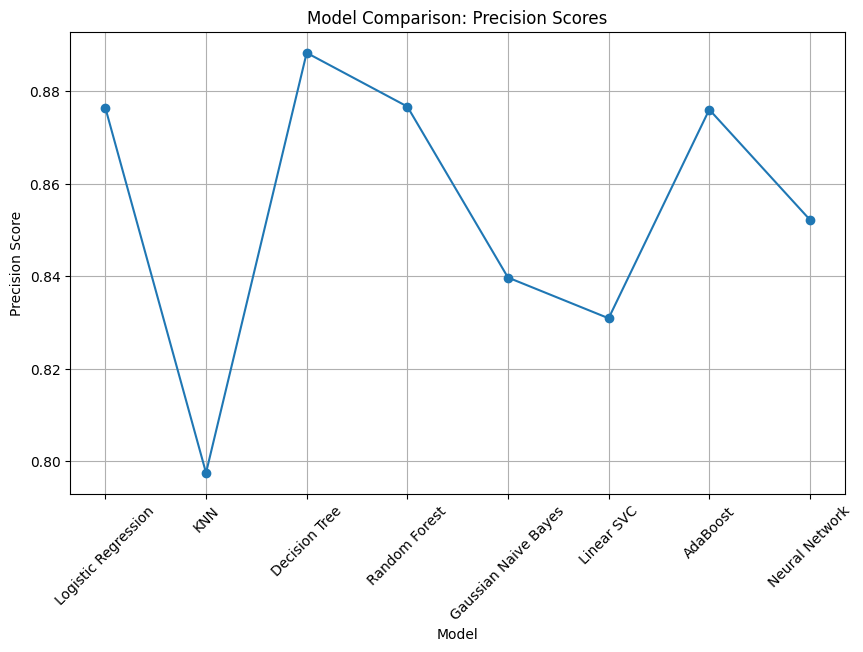

In [ ]:
import matplotlib.pyplot as plt

# Store the precision scores for each model in a dictionary
model_precision_scores = {
    'Logistic Regression': precision_logreg,
    'KNN': precision_knn,
    'Decision Tree': precision_decision_tree,
    'Random Forest': precision_random_forest,
    'Gaussian Naive Bayes': precision_gnb,
    'Linear SVC': precision_lsvc,
    'AdaBoost': precision_adaboost,
    'Neural Network': precision_neural_network
}

# Create a line graph to compare precision scores
plt.figure(figsize=(10, 6))
plt.plot(list(model_precision_scores.keys()), list(model_precision_scores.values()), marker='o')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Model Comparison: Precision Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


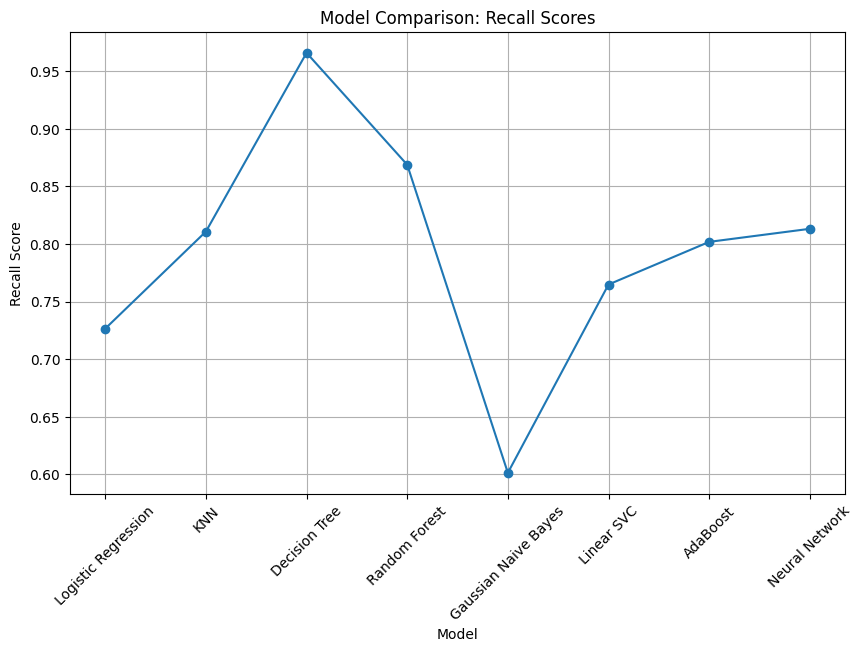

In [ ]:
# Store the recall scores for each model in a dictionary
model_recall_scores = {
    'Logistic Regression': recall_logreg,
    'KNN': recall_knn,
    'Decision Tree': recall_decision_tree,
    'Random Forest': recall_random_forest,
    'Gaussian Naive Bayes': recall_gnb,
    'Linear SVC': recall_lsvc,
    'AdaBoost': recall_adaboost,
    'Neural Network': recall_neural_network
}

# Create a line graph to compare recall scores
plt.figure(figsize=(10, 6))
plt.plot(list(model_recall_scores.keys()), list(model_recall_scores.values()), marker='o')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Model Comparison: Recall Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


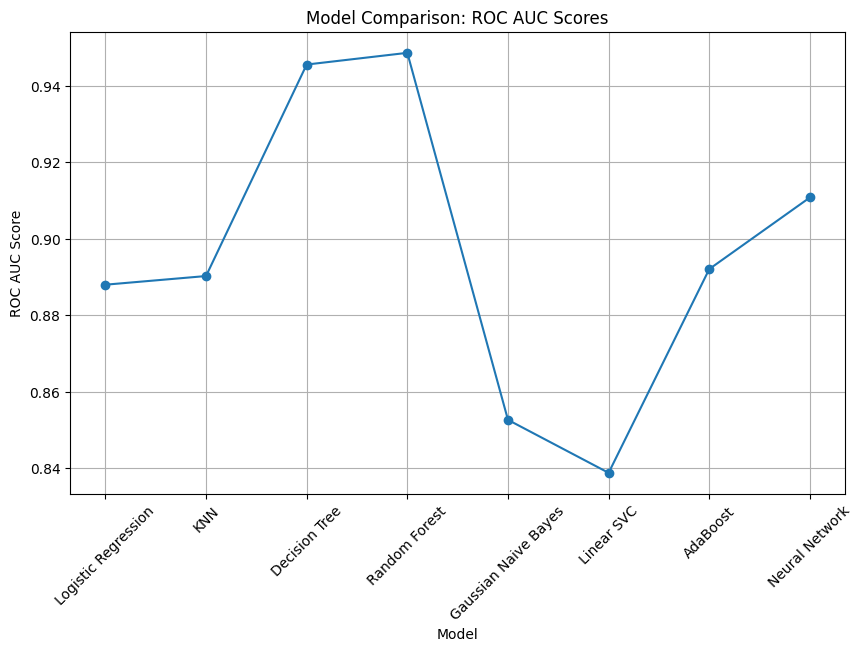

In [ ]:
# Store the ROC AUC scores for each model in a dictionary
model_roc_auc_scores = {
    'Logistic Regression': roc_auc_logreg,
    'KNN': roc_auc_knn,
    'Decision Tree': roc_auc_decision_tree,
    'Random Forest': roc_auc_random_forest,
    'Gaussian Naive Bayes': roc_auc_gnb,
    'Linear SVC': roc_auc_lsvc,
    'AdaBoost': roc_auc_adaboost,
    'Neural Network': roc_auc_neural_network
}

# Create a line graph to compare ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(list(model_roc_auc_scores.keys()), list(model_roc_auc_scores.values()), marker='o')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('Model Comparison: ROC AUC Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Create a DataFrame with the evaluation metrics for each model
data = {
    'Model': list(model_roc_auc_scores.keys()),
    'Train Accuracy': list(model_accuracy_scores.values()),
    'Train F1': list(model_f1_scores.values()),
    'Train Averge Precision': list(model_avg_precision_scores.values()),
    'Train Precision' :list(model_precision_scores.values()),
    'Train Recall':list(model_recall_scores.values()),
    'Train ROC AUC': list(model_roc_auc_scores.values())
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                  Model  Train Accuracy  Train F1  Train Averge Precision  \
0   Logistic Regression        0.811940  0.794321                0.884846   
1                   KNN        0.802378  0.804014                0.875074   
2         Decision Tree        0.922374  0.926469                0.903744   
3         Random Forest        0.873312  0.872748                0.944112   
4  Gaussian Naive Bayes        0.743038  0.700459                0.839262   
5            Linear SVC        0.781225  0.706097                0.837356   
6              AdaBoost        0.844150  0.837264                0.887706   
7        Neural Network        0.844867  0.836762                0.907605   

   Train Precision  Train Recall  Train ROC AUC  
0         0.876397      0.726426       0.887976  
1         0.797466      0.810802       0.890241  
2         0.888310      0.966174       0.945597  
3         0.876691      0.868890       0.948660  
4         0.839709      0.601048       0.852596  
5     

***

&nbsp;

# **Test Set Performance**

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X, y)
logreg_test_accuracy = np.round(logreg_model.score(X_test[selected_cols], y_test),2)
print(f'Logistic Regression Test Accuracy: {logreg_test_accuracy}')

Logistic Regression Test Accuracy: 0.88


In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X, y)
knn_test_accuracy =  np.round(knn_model.score(X_test[selected_cols], y_test),2)
print(f'KNN Test Accuracy: {knn_test_accuracy}')


KNN Test Accuracy: 0.78


In [ ]:
# Decision Tree
decision_tree_model = tree.DecisionTreeClassifier(max_depth=i)
decision_tree_model.fit(X, y)
decision_tree_test_accuracy = np.round(decision_tree_model.score(X_test[selected_cols], y_test),2)
print(f'Decision Tree Test Accuracy: {decision_tree_test_accuracy}')

Decision Tree Test Accuracy: 0.85


In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=9, criterion="gini")
random_forest_model.fit(X, y)
random_forest_test_accuracy = np.round(random_forest_model.score(X_test[selected_cols], y_test),2)
print(f'Random Forest Test Accuracy: {random_forest_test_accuracy}')

Random Forest Test Accuracy: 0.87


In [ ]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
gnb_test_accuracy = np.round(gnb_model.score(X_test[selected_cols], y_test),2)
print(f'Gaussian Naive Bayes Test Accuracy: {gnb_test_accuracy}')

Gaussian Naive Bayes Test Accuracy: 0.84


In [ ]:
# Linear SVC
lsvc_model = LinearSVC()
lsvc_model.fit(X, y)
lsvc_test_accuracy = np.round(lsvc_model.score(X_test[selected_cols], y_test),2)
print(f'Linear SVC Test Accuracy: {lsvc_test_accuracy}')

Linear SVC Test Accuracy: 0.88


In [ ]:

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X, y)
adaboost_test_accuracy = np.round(adaboost_model.score(X_test[selected_cols], y_test),2)
print(f'AdaBoost Test Accuracy: {adaboost_test_accuracy}')

AdaBoost Test Accuracy: 0.87


In [ ]:

# Neural Network
neural_network_model = MLPClassifier()
neural_network_model.fit(X, y)
neural_network_test_accuracy = np.round(neural_network_model.score(X_test[selected_cols], y_test),2)
print(f'Neural Network Test Accuracy: {neural_network_test_accuracy}')


Neural Network Test Accuracy: 0.87


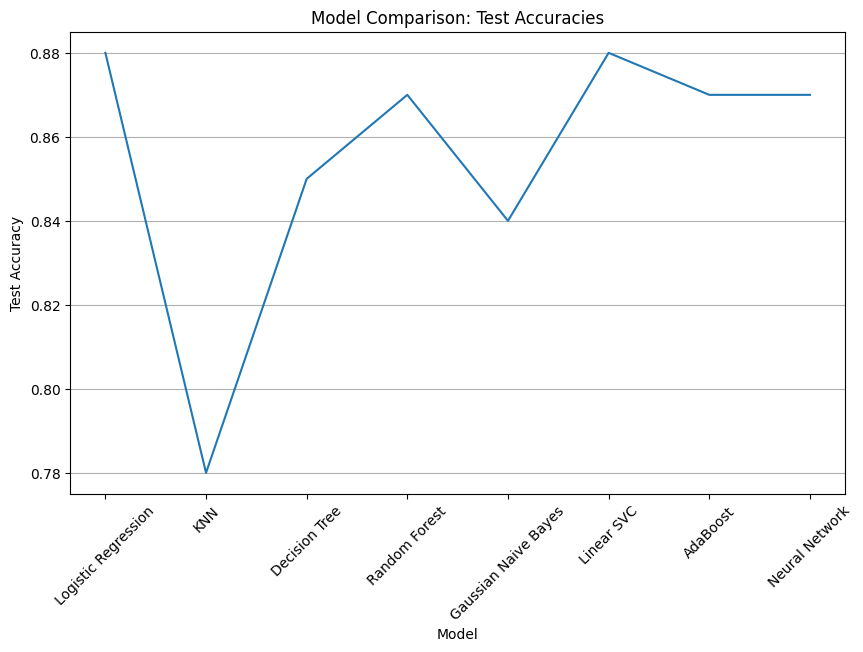

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated the test accuracies for all models as shown in the previous code

# Store the test accuracies for each model in a dictionary
model_test_accuracies = {
    'Logistic Regression': logreg_test_accuracy,
    'KNN': knn_test_accuracy,
    'Decision Tree': decision_tree_test_accuracy,
    'Random Forest': random_forest_test_accuracy,
    'Gaussian Naive Bayes': gnb_test_accuracy,
    'Linear SVC': lsvc_test_accuracy,
    'AdaBoost': adaboost_test_accuracy,
    'Neural Network': neural_network_test_accuracy
}

# Create a bar plot to compare test accuracies
plt.figure(figsize=(10, 6))
plt.plot(model_test_accuracies.keys(), model_test_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison: Test Accuracies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


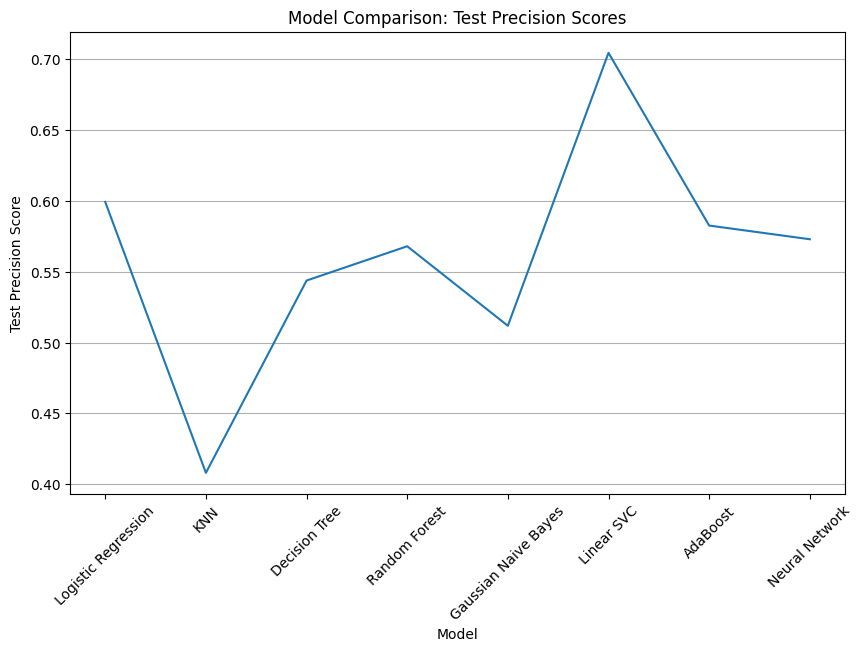

In [ ]:
# Calculate precision scores for each model
logreg_test_precision = precision_score(y_test, logreg_model.predict(X_test[selected_cols]))
knn_test_precision = precision_score(y_test, knn_model.predict(X_test[selected_cols]))
decision_tree_test_precision = precision_score(y_test, decision_tree_model.predict(X_test[selected_cols]))
random_forest_test_precision = precision_score(y_test, random_forest_model.predict(X_test[selected_cols]))
gnb_test_precision = precision_score(y_test, gnb_model.predict(X_test[selected_cols]))
lsvc_test_precision = precision_score(y_test, lsvc_model.predict(X_test[selected_cols]))
adaboost_test_precision = precision_score(y_test, adaboost_model.predict(X_test[selected_cols]))
neural_network_test_precision = precision_score(y_test, neural_network_model.predict(X_test[selected_cols]))

# Store the precision scores for each model in a dictionary
model_test_precision_scores = {
    'Logistic Regression': logreg_test_precision,
    'KNN': knn_test_precision,
    'Decision Tree': decision_tree_test_precision,
    'Random Forest': random_forest_test_precision,
    'Gaussian Naive Bayes': gnb_test_precision,
    'Linear SVC': lsvc_test_precision,
    'AdaBoost': adaboost_test_precision,
    'Neural Network': neural_network_test_precision
}

# Create a bar plot to compare precision scores
plt.figure(figsize=(10, 6))
plt.plot(model_test_precision_scores.keys(), model_test_precision_scores.values())
plt.xlabel('Model')
plt.ylabel('Test Precision Score')
plt.title('Model Comparison: Test Precision Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Create a DataFrame with the evaluation metrics for each model
data = {
    'Model': list(model_test_precision_scores.keys()),
    'Test Accuracy': list(model_test_accuracies.values()),
    'Test Precision': list(model_test_precision_scores.values())
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                  Model  Test Accuracy  Test Precision
0   Logistic Regression           0.88        0.599229
1                   KNN           0.78        0.408104
2         Decision Tree           0.85        0.543788
3         Random Forest           0.87        0.567986
4  Gaussian Naive Bayes           0.84        0.511879
5            Linear SVC           0.88        0.704467
6              AdaBoost           0.87        0.582593
7        Neural Network           0.87        0.572935
